In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

train_data = datasets.FashionMNIST(root='/home/manchik-pt7714/Documents/ML Tasks/data/temp/',train=True,transform=transform,download=False)
test_data = datasets.FashionMNIST(root='/home/manchik-pt7714/Documents/ML Tasks/data/temp/',train=False,transform=transform,download=False)

train_load = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
test_load = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False)

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1,32,kernel_size=3)
        self.pool = nn.MaxPool2d(2,2)
        self.fc = nn.Linear(32*13*13,10)
        
    def forward(self,x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1,32*13*13)
        x = self.fc(x)
        return x
        
model = CNN()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)  

In [5]:
count = 100
train_losses = []
val_losses = []

for epoch in range(count):
    model.train()  
    epoch_train_loss = 0.0
    
    for images, labels in train_load:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
        
    train_losses.append(epoch_train_loss / len(train_load))
    
    
    model.eval()  
    epoch_val_loss = 0.0
    
    with torch.no_grad(): 
        for images, labels in test_load:
            outputs = model(images)
            loss = criterion(outputs, labels)
            epoch_val_loss += loss.item()
    
    val_losses.append(epoch_val_loss / len(test_load))
    
    
    print(f"Epoch: {epoch + 1}/{count}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")
    


Epoch: 1/100, Training Loss: 0.7381, Validation Loss: 0.5078
Epoch: 2/100, Training Loss: 0.4417, Validation Loss: 0.4357
Epoch: 3/100, Training Loss: 0.3872, Validation Loss: 0.3971
Epoch: 4/100, Training Loss: 0.3585, Validation Loss: 0.3735
Epoch: 5/100, Training Loss: 0.3400, Validation Loss: 0.3586
Epoch: 6/100, Training Loss: 0.3267, Validation Loss: 0.3566
Epoch: 7/100, Training Loss: 0.3156, Validation Loss: 0.3459
Epoch: 8/100, Training Loss: 0.3071, Validation Loss: 0.3353
Epoch: 9/100, Training Loss: 0.2996, Validation Loss: 0.3267
Epoch: 10/100, Training Loss: 0.2939, Validation Loss: 0.3218
Epoch: 11/100, Training Loss: 0.2877, Validation Loss: 0.3206
Epoch: 12/100, Training Loss: 0.2833, Validation Loss: 0.3205
Epoch: 13/100, Training Loss: 0.2773, Validation Loss: 0.3135
Epoch: 14/100, Training Loss: 0.2737, Validation Loss: 0.3089
Epoch: 15/100, Training Loss: 0.2698, Validation Loss: 0.3088
Epoch: 16/100, Training Loss: 0.2662, Validation Loss: 0.3069
Epoch: 17/100, Tr

In [6]:
def evaluate_accuracy(loader, model):
    model.eval()  
    correct = 0
    total = 0
    
    with torch.no_grad():  
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    accuracy = 100 * correct / total
    return accuracy


test_accuracy = evaluate_accuracy(test_load, model)
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 90.32%


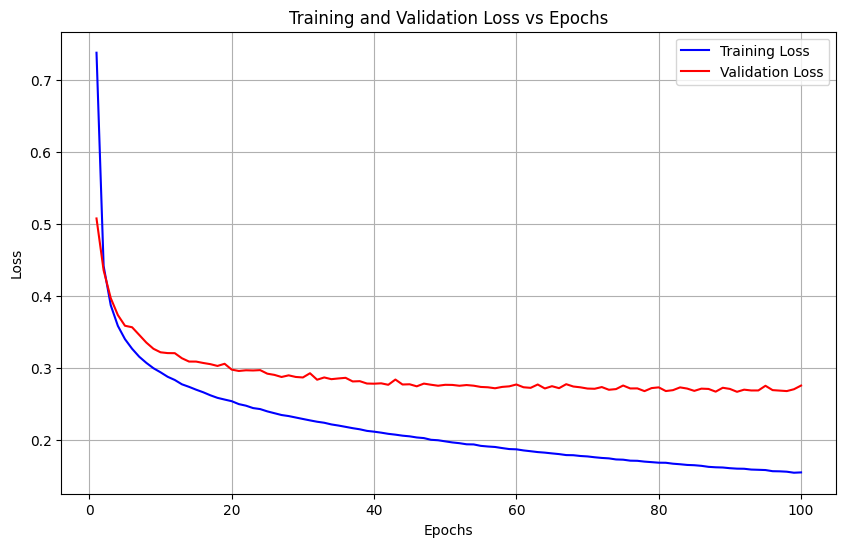

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()
